In [1]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21); OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from /home/tigran/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwbvyfzcz
  JVM stdout: /tmp/tmpwbvyfzcz/h2o_tigran_started_from_python.out
  JVM stderr: /tmp/tmpwbvyfzcz/h2o_tigran_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Yerevan
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_tigran_qgo9o6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.850 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
train = h2o.upload_file(path='/home/tigran/Downloads/code/Data/higgs_train_10k.csv')
test = h2o.upload_file(path='/home/tigran/Downloads/code/Data/higgs_test_5k.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
train.head()

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
1,0.869293,-0.635082,0.22569,0.32747,-0.689993,0.754202,-0.248573,-1.09206,0,1.37499,-0.653674,0.930349,1.10744,1.1389,-1.5782,-1.04699,0,0.65793,-0.0104546,-0.0457672,3.10196,1.35376,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.49797,-0.31301,1.09553,-0.557525,-1.58823,2.17308,0.812581,-0.213642,1.27101,2.21487,0.499994,-1.26143,0.732156,0,0.398701,-1.13893,-0.00081911,0,0.30222,0.833048,0.9857,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.47064,-1.63597,0.453773,0.425629,1.10487,1.28232,1.38166,0,0.851737,1.54066,-0.81969,2.21487,0.99349,0.35608,-0.208778,2.54822,1.25695,1.12885,0.900461,0,0.909753,1.10833,0.985692,0.951331,0.803252,0.865924,0.780118
0,1.34438,-0.876626,0.935913,1.99205,0.882454,1.78607,-1.64678,-0.942383,0,2.42326,-0.676016,0.736159,2.21487,1.29872,-1.43074,-0.364658,0,0.745313,-0.678379,-1.36036,0,0.946652,1.0287,0.998656,0.728281,0.8692,1.02674,0.957904
1,1.10501,0.321356,1.5224,0.882808,-1.20535,0.681466,-1.07046,-0.921871,0,0.800872,1.02097,0.971407,2.21487,0.596761,-0.350273,0.631194,0,0.479999,-0.373566,0.113041,0,0.755856,1.36106,0.98661,0.838085,1.1333,0.872245,0.808487
0,1.59584,-0.607811,0.00707492,1.81845,-0.111906,0.84755,-0.566437,1.58124,2.17308,0.755421,0.64311,1.42637,0,0.921661,-1.19043,-1.61559,0,0.651114,-0.654227,-1.27434,3.10196,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
1,0.409391,-1.88468,-1.02729,1.67245,-1.6046,1.33801,0.0554274,0.0134659,2.17308,0.509783,-1.03834,0.707862,0,0.746918,-0.358465,-1.64665,0,0.367058,0.0694965,1.37713,3.10196,0.869418,1.22208,1.00063,0.545045,0.698653,0.977314,0.828786
1,0.933895,0.62913,0.527535,0.238033,-0.966569,0.547811,-0.0594392,-1.70687,2.17308,0.941003,-2.65373,-0.15722,0,1.03037,-0.175505,0.523021,2.54822,1.37355,1.29125,-1.46745,0,0.901837,1.08367,0.979696,0.7833,0.849195,0.894356,0.774879
1,1.40514,0.536603,0.689554,1.17957,-0.110061,3.2024,-1.52696,-1.57603,0,2.93154,0.567342,-0.130033,2.21487,1.78712,0.899499,0.585151,2.54822,0.401865,-0.151202,1.16349,0,1.66707,4.03927,1.17583,1.04535,1.54297,3.53483,2.74075
1,1.17657,0.104161,1.397,0.479721,0.265513,1.13556,1.53483,-0.253291,0,1.02725,0.534316,1.18002,0,2.40566,0.0875568,-0.976534,2.54822,1.25038,0.268541,0.530334,0,0.833175,0.773968,0.98575,1.1037,0.84914,0.937104,0.812364


In [5]:
type(train)

h2o.frame.H2OFrame

In [6]:
x = train.columns
y = 'response'
x.remove(y)

In [7]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [8]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),17/20
# GBM base models (used / total),6/7
# XGBoost base models (used / total),5/6
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),3/4
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [9]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20230514_125643,0.788645,0.55064,0.80736,0.320264,0.43227,0.186858
StackedEnsemble_BestOfFamily_1_AutoML_1_20230514_125643,0.788094,0.551166,0.805933,0.319898,0.432486,0.187044
GBM_1_AutoML_1_20230514_125643,0.782194,0.557734,0.800444,0.328093,0.435367,0.189544
GBM_2_AutoML_1_20230514_125643,0.779728,0.560845,0.798186,0.328244,0.436651,0.190664
GBM_5_AutoML_1_20230514_125643,0.77877,0.561756,0.796697,0.333878,0.437108,0.191063
GBM_grid_1_AutoML_1_20230514_125643_model_2,0.777848,0.564655,0.795318,0.332602,0.438088,0.191921
GBM_3_AutoML_1_20230514_125643,0.77498,0.565286,0.794945,0.335329,0.438932,0.192661
GBM_4_AutoML_1_20230514_125643,0.769915,0.570673,0.787955,0.34518,0.441434,0.194864
XGBoost_grid_1_AutoML_1_20230514_125643_model_2,0.769128,0.581469,0.786907,0.345678,0.444983,0.19801
XGBoost_3_AutoML_1_20230514_125643,0.768123,0.574021,0.7872,0.337561,0.442807,0.196078


In [10]:
preds = aml.predict(test)
preds

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.733204,0.266796
0,0.711479,0.288521
1,0.547802,0.452198
1,0.357282,0.642718
0,0.734474,0.265526
1,0.241744,0.758256
1,0.244322,0.755678
1,0.633065,0.366935
1,0.584386,0.415614
0,0.745803,0.254197


In [11]:
preds = aml.leader.predict(test)
preds

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.733204,0.266796
0,0.711479,0.288521
1,0.547802,0.452198
1,0.357282,0.642718
0,0.734474,0.265526
1,0.241744,0.758256
1,0.244322,0.755678
1,0.633065,0.366935
1,0.584386,0.415614
0,0.745803,0.254197


In [12]:
bestmodel_perf = aml.leader.model_performance(test)
print(bestmodel_perf.auc())

0.7952542522855155


In [16]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:, 0])

se = h2o.get_model([mid for mid in model_ids if 'StackedEnsemble_AllModels' in mid][0])

metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.coef_norm()

{'Intercept': 0.15210264642464072,
 'GBM_1_AutoML_1_20230514_125643': 0.2209058019649308,
 'GBM_2_AutoML_1_20230514_125643': 0.17071308561824247,
 'GBM_5_AutoML_1_20230514_125643': 0.10140392907428855,
 'GBM_grid_1_AutoML_1_20230514_125643_model_2': 0.0,
 'GBM_3_AutoML_1_20230514_125643': 0.06684704576607187,
 'GBM_4_AutoML_1_20230514_125643': 0.03645699275827083,
 'XGBoost_grid_1_AutoML_1_20230514_125643_model_2': 0.20237574934287522,
 'XGBoost_3_AutoML_1_20230514_125643': 0.07187658514430718,
 'XGBoost_grid_1_AutoML_1_20230514_125643_model_3': 0.08730715339032045,
 'XRT_1_AutoML_1_20230514_125643': 0.040154588866714504,
 'DRF_1_AutoML_1_20230514_125643': 0.07223628434913645,
 'XGBoost_1_AutoML_1_20230514_125643': 0.03110444831420675,
 'XGBoost_grid_1_AutoML_1_20230514_125643_model_1': 0.04718560993227906,
 'GBM_grid_1_AutoML_1_20230514_125643_model_1': 0.02710228394498863,
 'XGBoost_2_AutoML_1_20230514_125643': 0.0,
 'DeepLearning_grid_3_AutoML_1_20230514_125643_model_1': 0.120505267

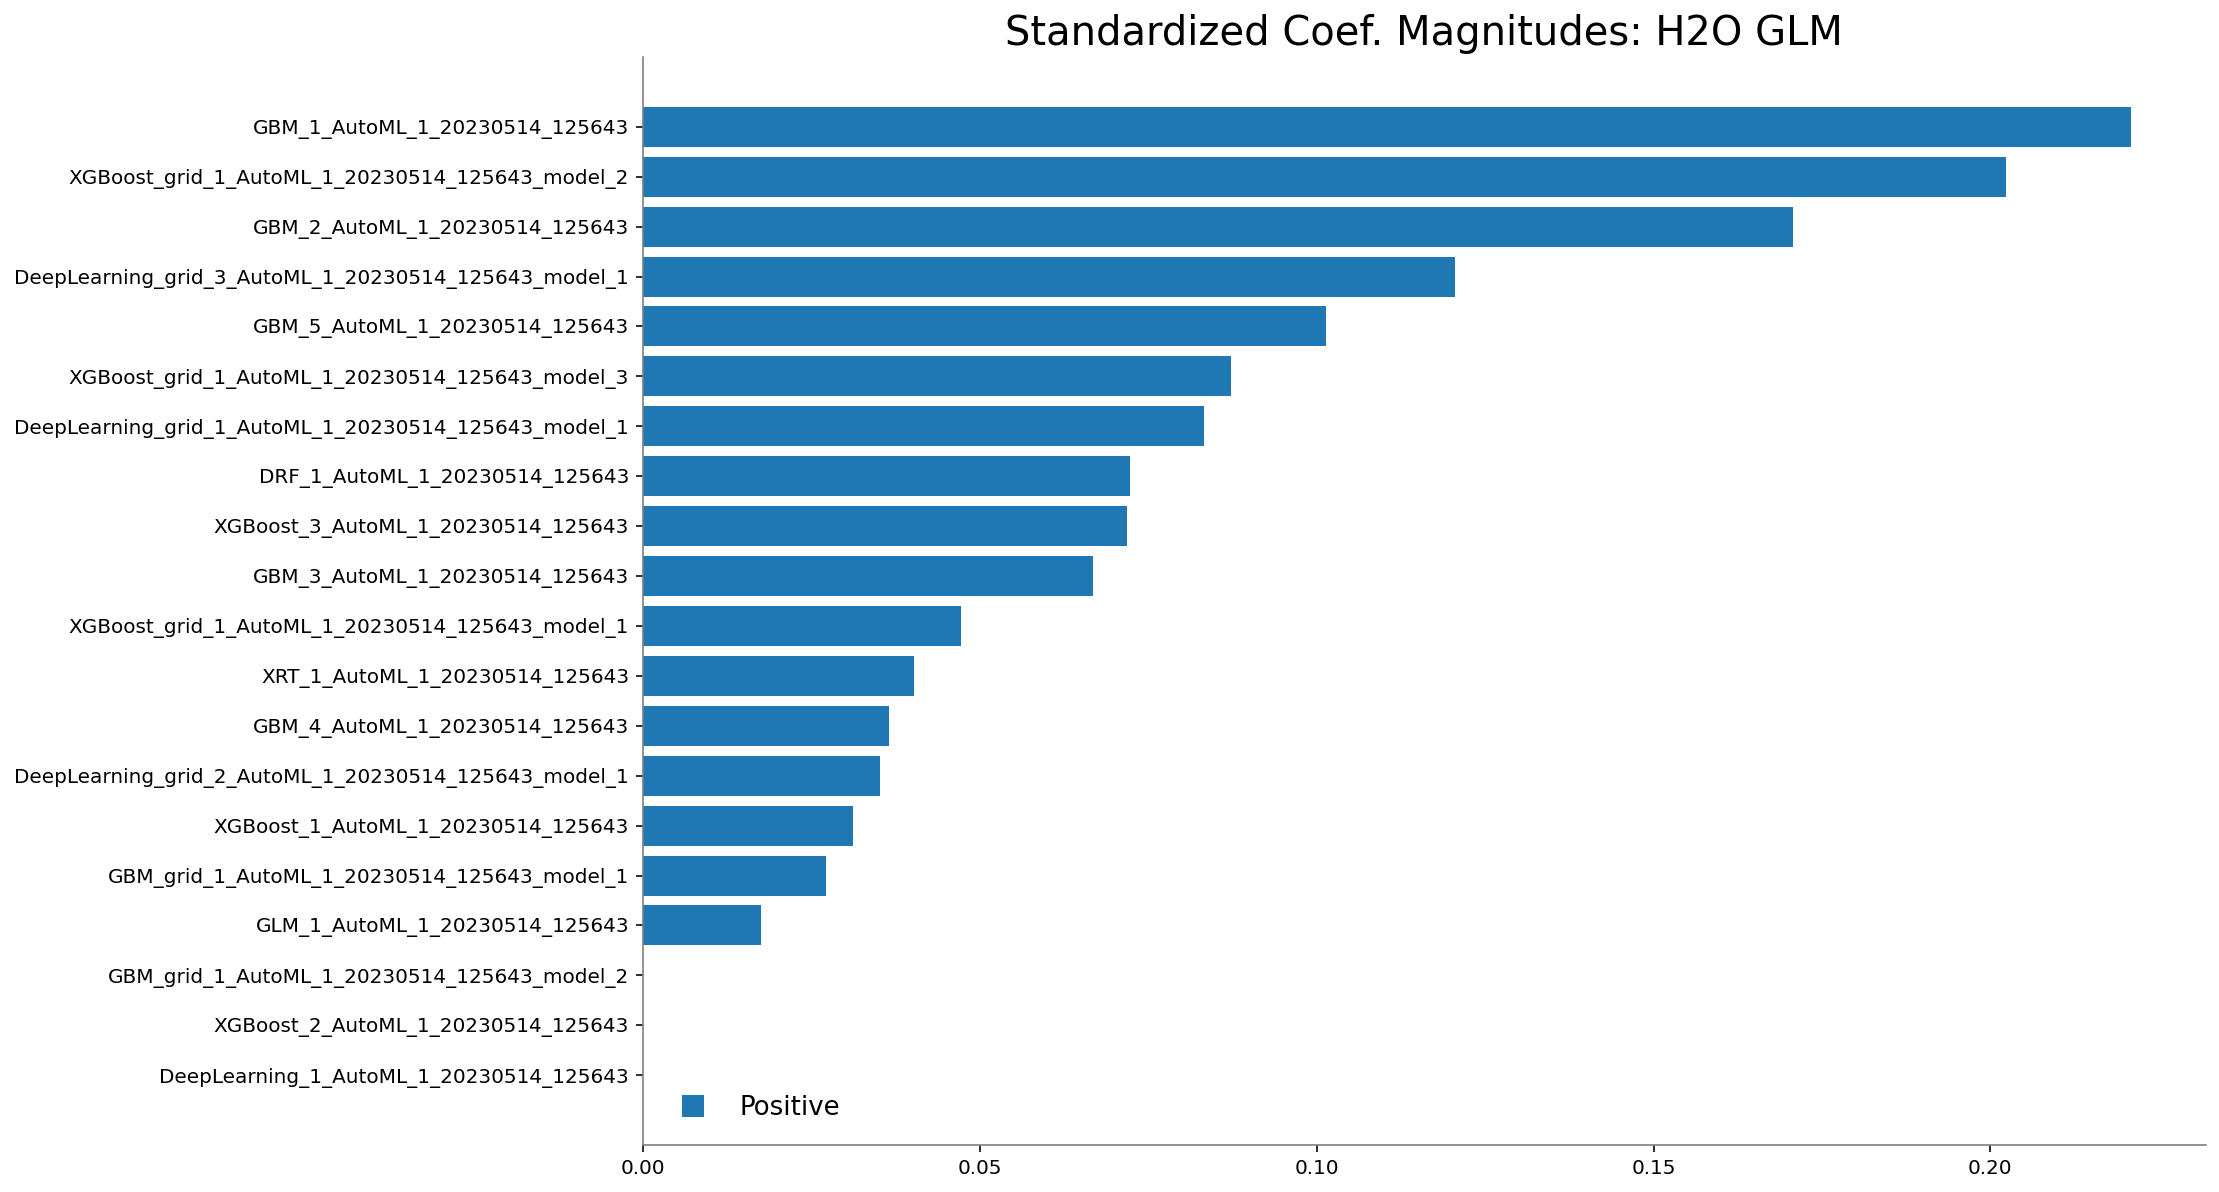

In [17]:
metalearner.std_coef_plot();

In [18]:
pth = ('/home/tigran/myprojects/best_model_automl_h2o')
h2o.save_model(aml.leader, path=pth)

'/home/tigran/myprojects/best_model_automl_h2o/StackedEnsemble_AllModels_1_AutoML_1_20230514_125643'